# Play with DL

### First, let's go through the tutorials from TensorFlow

Setup tensorflow

In [26]:
import numpy as np
import tensorflow as tf

TF_CPP_MIN_LOG_LEVEL="3"

In [27]:
print('TensorFlow version: ', tf.__version__)
np.__version__

TensorFlow version:  2.11.0


'1.24.0'

What running device?

In [28]:
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


What's next? At first try mnist

In [29]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_train = x_test / 255.0, x_train / 255.0

Create model

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

Test prediction

In [31]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.4022084 , -0.51673263, -0.212406  ,  1.425642  ,  0.03383434,
         0.12788683, -0.12077716,  0.81728643, -0.89673066,  0.23254892]],
      dtype=float32)

Make probabilities from this output

In [32]:
tf.nn.softmax(predictions).numpy()

array([[0.10640019, 0.04244743, 0.05754647, 0.29608333, 0.07361386,
        0.08087346, 0.06306852, 0.1611419 , 0.02902821, 0.08979667]],
      dtype=float32)

Define a loos functon for train

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Loss is zero if model confident of the correct class

Model not trained, so the probs will be random (something like 1/10 for each class), then loss will be closer to `log(1/10) ~= 2.3`
Let's watch)

In [34]:
loss_fn(y_train[:1], predictions).numpy()

2.5148697

Compile model

In [35]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Train model!)
Start training with 5 epochs

In [36]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2963 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1436 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9768


Fine! Let's try more epochs, for example 15

In [37]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9794
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9812
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9833
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9849
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.9852
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9861
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9871
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9877
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9882
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.030

I want to overfit this model, interesting how more epochs need?

In [54]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1811 - val_accuracy: 0.9793
Epoch 36/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.1880 - val_accuracy: 0.9804
Epoch 37/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1790 - val_accuracy: 0.9803
Epoch 38/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1810 - val_accuracy: 0.9811
Epoch 39/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.1693 - val_accuracy: 0.9804
Epoch 40/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.1782 - val_accuracy: 0.9801
Epoch 41/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1766 - val_accuracy

Mnist is small dataset, and classes have not many features, but anyway we can see overfitting. Real accuracy decreases with increasing epochs after some point(E 20)

Get accuracy with other method

In [40]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1349 - accuracy: 0.9802 - 539ms/epoch - 2ms/step


[0.13492614030838013, 0.9801999926567078]

Look at the learning history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


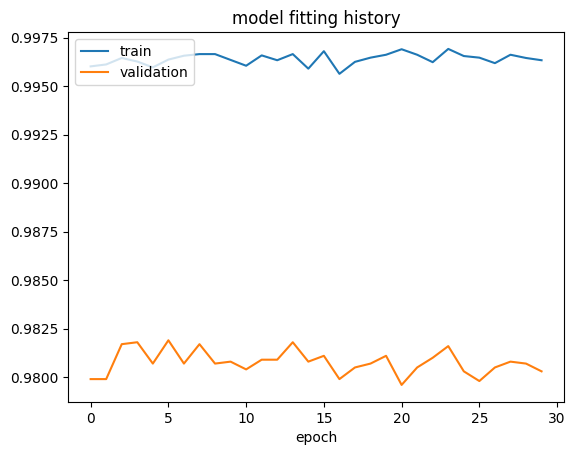

In [47]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model fitting history')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
history_ = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.2160 - val_accuracy: 0.9797
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.2088 - val_accuracy: 0.9819
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.2099 - val_accuracy: 0.9809
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.2131 - val_accuracy: 0.9807
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.2201 - val_accuracy: 0.9801
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.2124 - val_accuracy: 0.9794
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.2280 - val_ac

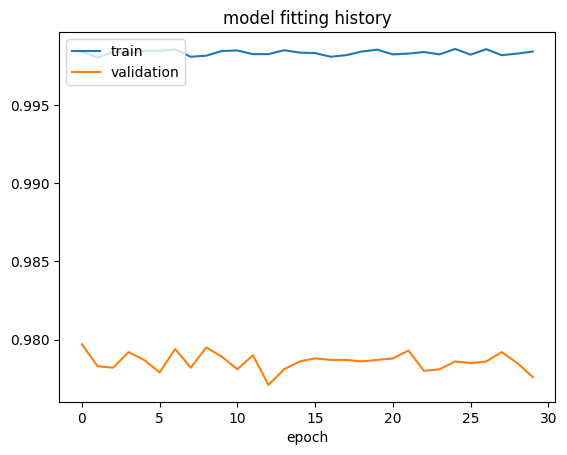

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model fitting history')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()